<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [46]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [47]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [48]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [51]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

In [52]:
train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1})

In [55]:
train_df['Embarked'] = train_df['Embarked'].map({"S" : 0, "C" : 1, "Q": 2})

In [56]:
train_df['Embarked'].head(10)

PassengerId
1     0
2     1
3     0
4     0
5     0
7     0
8     0
9     0
10    1
11    0
Name: Embarked, dtype: int64

In [75]:
from collections import Counter

In [76]:
c = Counter(train_df["Fare"])

In [79]:
for x in sorted(c, reverse = True):
    print x, c[x]

512.3292 3
263.0 4
262.375 2
247.5208 2
227.525 3
211.5 1
211.3375 3
164.8667 2
153.4625 3
151.55 4
146.5208 1
135.6333 3
134.5 2
133.65 1
120.0 4
113.275 3
110.8833 3
108.9 2
106.425 2
93.5 2
91.0792 2
90.0 4
89.1042 1
86.5 3
83.475 2
83.1583 3
82.1708 1
81.8583 1
79.65 3
79.2 3
78.85 2
78.2667 2
77.9583 3
77.2875 2
76.7292 3
76.2917 1
75.25 1
73.5 5
71.2833 1
71.0 2
69.3 2
66.6 2
65.0 2
63.3583 1
61.9792 1
61.3792 1
61.175 1
59.4 1
57.9792 2
57.0 2
56.9292 2
56.4958 4
55.9 2
55.4417 1
55.0 1
53.1 5
52.5542 3
52.0 5
51.8625 1
51.4792 1
50.4958 1
49.5042 2
49.5 1
47.1 1
46.9 6
41.5792 3
40.125 1
39.6875 6
39.6 1
39.4 1
39.0 4
38.5 1
37.0042 2
36.75 2
35.5 3
34.6542 1
34.375 4
34.0208 1
33.5 1
33.0 2
32.5 1
32.3208 1
31.3875 4
31.275 7
31.0 2
30.6958 1
30.5 4
30.0708 2
30.0 5
29.7 2
29.125 5
29.0 2
28.7125 1
28.5 1
27.9 6
27.75 4
27.7208 3
27.0 2
26.55 13
26.3875 1
26.2875 3
26.2833 1
26.25 6
26.0 30
25.9292 2
25.5875 1
24.15 5
24.0 2
23.0 4
22.525 1
22.025 1
21.075 4
21.0 6
20.575 2
20

In [81]:
for i in (1, 2, 3):
    print np.mean(train_df[(train_df["Pclass"] == i) & (train_df["Fare"] < 500)]["Fare"])

81.01583812154695
21.471556069364162
13.229435211267605


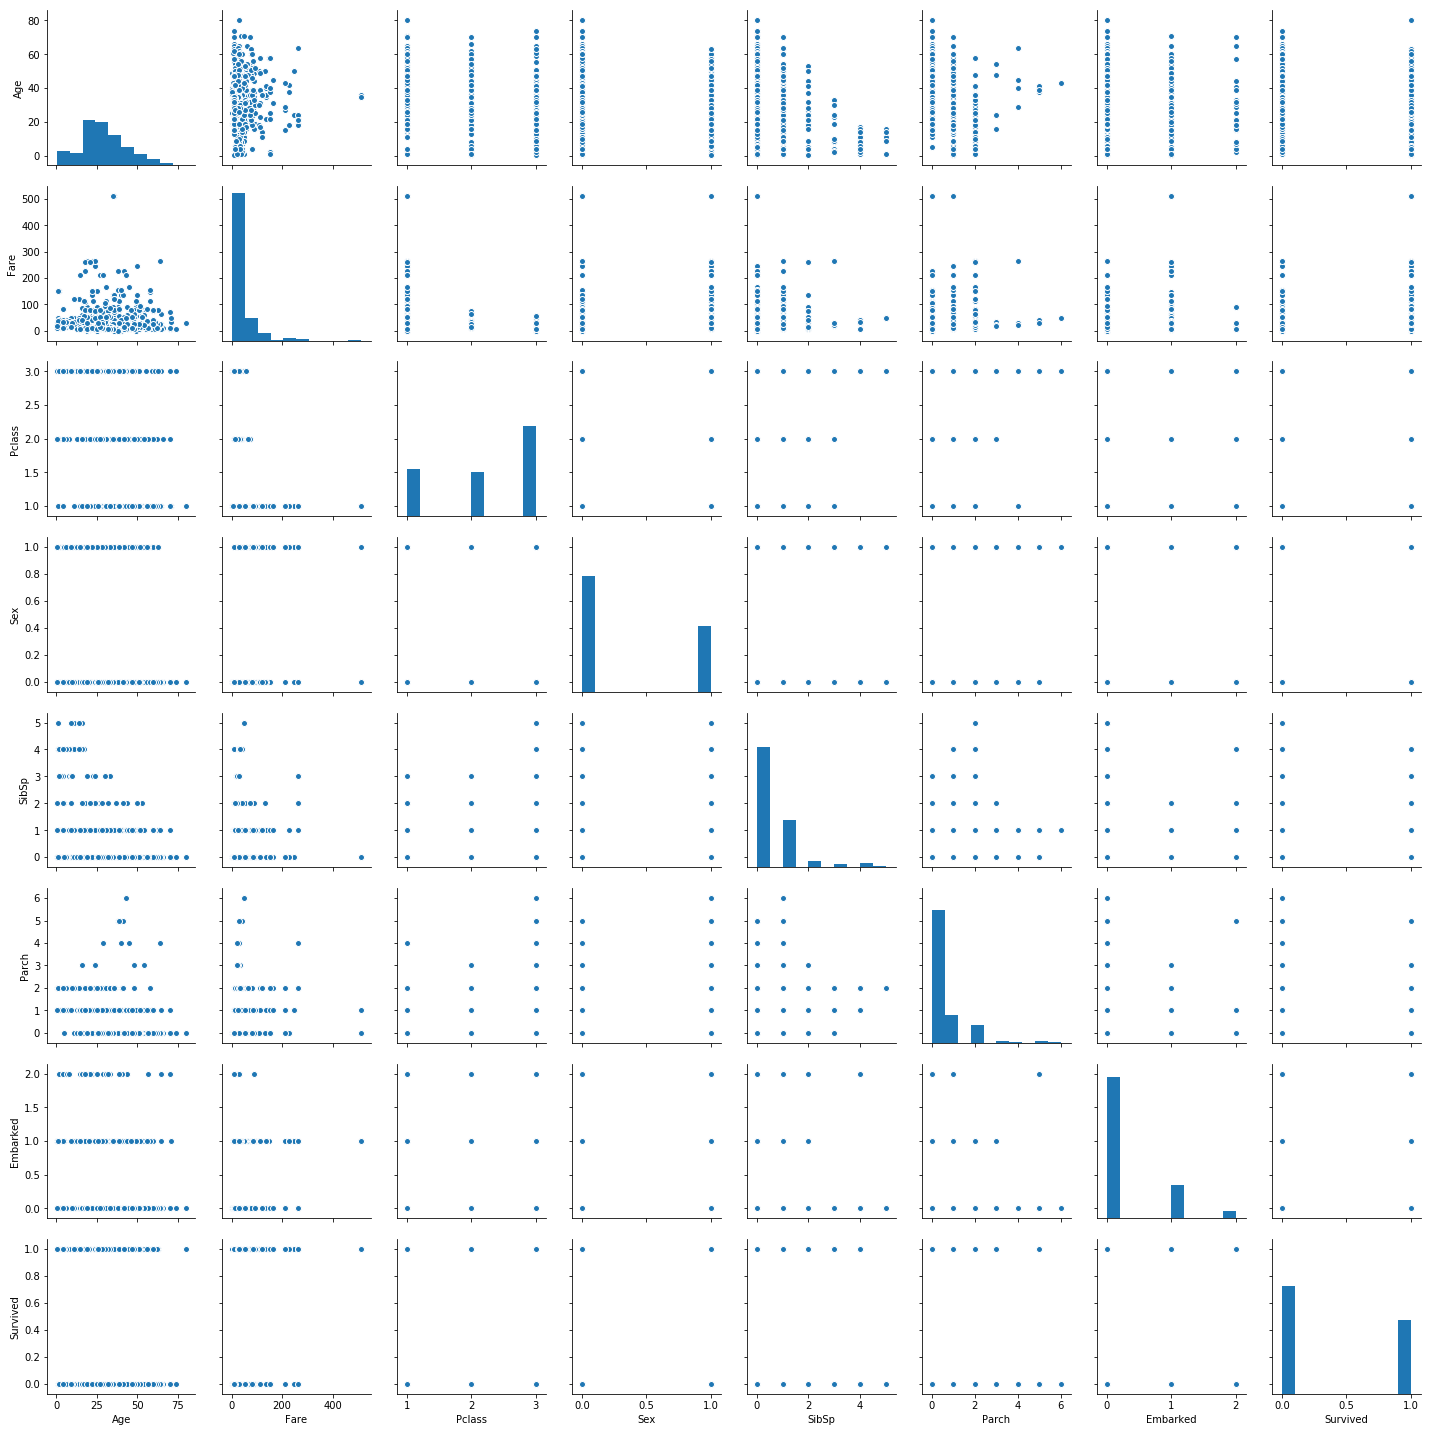

In [57]:
cols = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
sns.pairplot(train_df[cols]);

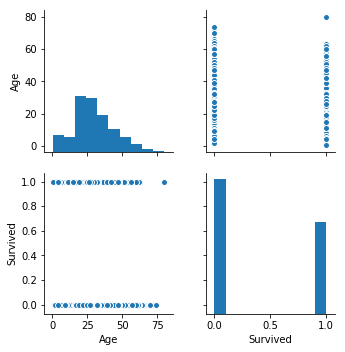

In [65]:
sns.pairplot(train_df[['Age', 'Survived']]);

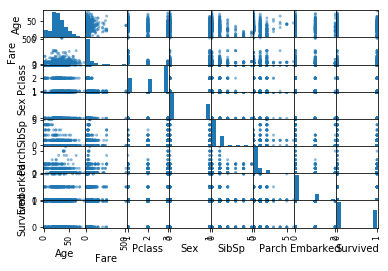

In [58]:
pd.plotting.scatter_matrix(train_df[cols]);

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

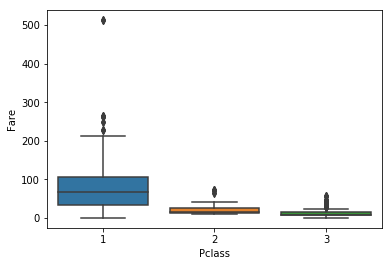

In [82]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [ ]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = # Ваш код здесь
fare_pclass2_no_out = # Ваш код здесь
fare_pclass3_no_out = # Ваш код здесь
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [84]:
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
0,360,93
1,64,195


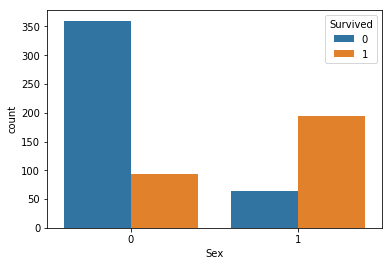

In [83]:
sns.countplot(x='Sex', hue='Survived', data=train_df);

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

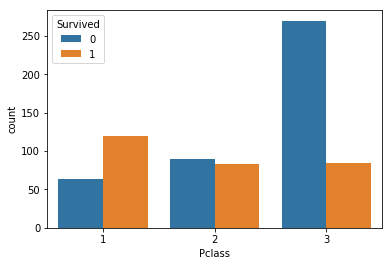

In [85]:
sns.countplot(x='Pclass', hue='Survived', data=train_df);

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [87]:
young = train_df[train_df['Age'] < 30]
young.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1


In [100]:
old = train_df[train_df['Age'] > 60]
old.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,0
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,1


In [104]:
def age_category(age):
  if age < 30:
    return 1
  elif age > 60:
    return 2
  else:
    return 3

In [105]:
train_df['Age_category'] = train_df['Age'].apply(age_cathegory)

In [107]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_category
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,3
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,3
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,3


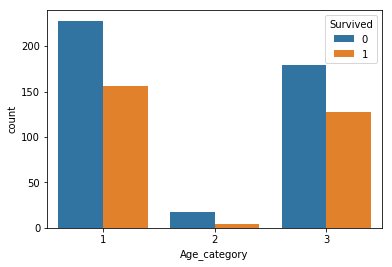

In [108]:
sns.countplot(x='Age_category', hue='Survived', data=train_df);

In [109]:
pd.crosstab(train_df['Survived'], train_df['Age_category'])

Age_category,1,2,3
Survived,,,
0,228,17,179
1,156,4,128
